# Analyzing Crime Data of DC

Here we explore the Crime data for DC from the years 2008-107. This dataset contains spatial temporal information about the crime along with other details about the nature of the crime.

This dataset is explored in detail following this flow:

> 1. Introduction to data
> 2. Basic exploratory analysis
> 3. Statistical analysis (correlations)
> 4. Machine learning to predict crime types

### 1. Introduction to data

In [1]:
#Loading necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

In [2]:
#Reading the data
data = pd.read_csv("all_crime.csv")
data.shape

(379849, 27)

We notice that this dataset has 379,849 rows and 27 colums.

In [3]:
#View first 5 rows
data.head()

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,...,CENSUS_TRACT,VOTING_PRECINCT,XCOORD,YCOORD,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
0,0,-76.987540,38.903968,8149126,2008-10-19T18:30:00.000Z,EVENING,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF NEAL STREET NE,401081.000000,...,8802.0,Precinct 77,401168.64,137320.72,38.903960,-76.987537,NaN,2008-10-19T17:30:00.000Z,2008-10-19T17:40:00.000Z,79996081
1,1,-76.944599,38.898379,8149130,2008-10-19T17:00:00.000Z,EVENING,OTHERS,MOTOR VEHICLE THEFT,4000 - 4199 BLOCK OF GRANT STREET NE,404806.000000,...,7803.0,Precinct 99,404721.34,136747.74,38.898372,-76.944597,NaN,2008-10-19T14:30:00.000Z,2008-10-19T14:35:00.000Z,79996082
2,2,-77.012145,38.926290,8149134,2008-10-19T17:40:00.000Z,EVENING,OTHERS,THEFT/OTHER,1ST STREET NW AND MICHIGAN AVENUE NW,398947.110013,...,2302.0,Precinct 135,NaN,NaN,38.926282,-77.012142,NaN,2008-10-19T10:00:00.000Z,2008-10-19T17:00:00.000Z,79996083
3,3,-76.986275,38.944785,8149139,2008-10-19T18:00:00.000Z,EVENING,OTHERS,THEFT/OTHER,4500 - 4598 BLOCK OF SOUTH DAKOTA AVENUE NE,401190.000000,...,9503.0,Precinct 67,401339.81,142177.91,38.944777,-76.986273,NaN,2008-10-18T19:00:00.000Z,2008-10-19T08:00:00.000Z,79996084
4,4,-76.954487,38.885475,8149147,2008-10-19T18:00:00.000Z,EVENING,OTHERS,THEFT/OTHER,200 - 499 BLOCK OF ANACOSTIA ROAD SE,403949.000000,...,7703.0,Precinct 107,403978.70,135420.81,38.885467,-76.954484,NaN,2008-10-19T13:00:00.000Z,2008-10-19T17:00:00.000Z,79996085


In [4]:
#View column names and types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379849 entries, 0 to 379848
Data columns (total 27 columns):
Unnamed: 0              379849 non-null int64
X                       379849 non-null float64
Y                       379849 non-null float64
CCN                     379849 non-null int64
REPORT_DAT              379849 non-null object
SHIFT                   379849 non-null object
METHOD                  379849 non-null object
OFFENSE                 379849 non-null object
BLOCK                   379849 non-null object
XBLOCK                  379849 non-null float64
YBLOCK                  379849 non-null float64
WARD                    379835 non-null float64
ANC                     379849 non-null object
DISTRICT                379628 non-null float64
PSA                     379578 non-null float64
NEIGHBORHOOD_CLUSTER    374634 non-null object
BLOCK_GROUP             378632 non-null object
CENSUS_TRACT            378632 non-null float64
VOTING_PRECINCT         379757 non-nu

### 2. Basic exploratory analysis

We start by visualizing all the various types of crime

In [5]:
#Getting a list of the unique crime types
types = data['OFFENSE'].unique()
types

array(['THEFT/OTHER', 'MOTOR VEHICLE THEFT', 'BURGLARY', 'ROBBERY',
       'ASSAULT W/DANGEROUS WEAPON', 'SEX ABUSE', 'HOMICIDE', 'ARSON',
       'THEFT F/AUTO'], dtype=object)

In [6]:
#Frequency calculation of each crime type
counts = data['OFFENSE'].value_counts()
print(counts)

THEFT/OTHER                   144382
THEFT F/AUTO                   96192
ROBBERY                        38434
MOTOR VEHICLE THEFT            36208
BURGLARY                       34415
ASSAULT W/DANGEROUS WEAPON     25818
SEX ABUSE                       2714
HOMICIDE                        1335
ARSON                            351
Name: OFFENSE, dtype: int64


Text(0.5,1,'Types of crime based on frequency of occurence')

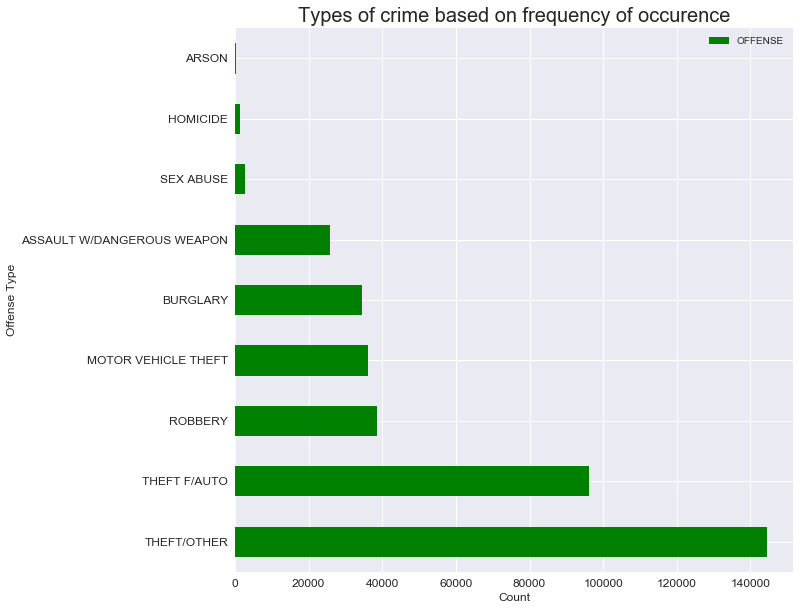

In [7]:
#Generates bar graph
ax = counts.plot(kind='barh', figsize=(10, 10), legend=True, fontsize=12, color='green')

#X axis text and display style of categories
ax.set_xlabel("Count", fontsize=12)
#plt.xticks(rotation=45)

#Y axis text
ax.set_ylabel("Offense Type", fontsize=12)

#Title
ax.set_title("Types of crime based on frequency of occurence", fontsize=20)

Let's now look deeper to see crimes distributed based on time/shift of the day

In [8]:
#Getting unique values for shift
types = list(data['SHIFT'].unique())
print(types)

['EVENING', 'MIDNIGHT', 'DAY']


In [9]:
#Frequency calculation of each shift type
sizes = data['SHIFT'].value_counts()
print(sizes)

EVENING     161118
DAY         146876
MIDNIGHT     71855
Name: SHIFT, dtype: int64


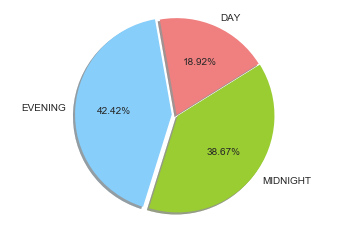

In [10]:
# Data to plot
labels = types
colors = ['lightskyblue', 'yellowgreen', 'lightcoral']
explode = (0.05, 0.015, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=100)
 
plt.axis('equal')
plt.show()

This shows that most crimes (contrary to poular belief), occur during the evening as opposed to midnight in the state of D.C.

### 3. Statistical analysis (Test of correlation) 

In [11]:
#Importing necessary packages
import scipy.stats
import random

The goal here is to perform the following tests of correlation
1. Pearson correlation to test if the  __type of crime__ is related to the __quadrant where it occurs__.
2. Spearman correlation (for ranked categories)  to test of the __type of crime__ is related to the __shift of the day when it occurs__.

The state of D.C. is divided into four quadrants 
> Northwest (NW), Northeast (NE), Southwest (SW), Southeast (SE)

We will first need to extract Quadrant from the `BLOCK` field and then convert the quadrant values and crime type to a numerical equivalent.

Let's start by looking at the `BLOCK` field

In [12]:
data['BLOCK'].head()

0            1200 - 1299 BLOCK OF NEAL STREET NE
1           4000 - 4199 BLOCK OF GRANT STREET NE
2           1ST STREET NW AND MICHIGAN AVENUE NW
3    4500 - 4598 BLOCK OF SOUTH DAKOTA AVENUE NE
4           200 - 499 BLOCK OF ANACOSTIA ROAD SE
Name: BLOCK, dtype: object

In [13]:
data['quadrant'] = data['BLOCK'].apply(lambda x: x[-2:])
data['quadrant'].head()

0    NE
1    NE
2    NW
3    NE
4    SE
Name: quadrant, dtype: object

In [14]:
data['quadrant'].unique()

array(['NE', 'NW', 'SE', 'ET', 'SW', 'TE', 'ND', 'BN', 'K)', '95', 'NB'], dtype=object)

Since the quadrant field also contains a lot of garbage values, we follow the following process

1. Convert valid values to numerical equivalent
2. Convert invalid values to 0

In [15]:
quadrant = {"NW":1, "NE":2, "SW":3, "SE":4}
data['quadrant'].replace(quadrant, inplace=True)
data['quadrant'].head()

0    2
1    2
2    1
3    2
4    4
Name: quadrant, dtype: object

In [16]:
def modifyToInteger(x):
    '''Function that converts valid fields to integer type and invalid fields to 0'''
    try:
        return int(x)
    except:
        return 0

In [17]:
#Applying function to column
data['quadrant'] = data['quadrant'].apply(modifyToInteger)

In [18]:
#Verifying function implentation
data['quadrant'].unique()

array([ 2,  1,  4,  0,  3, 95], dtype=int64)

Let us take a look at the frequency of crime based on type again

In [19]:
data['OFFENSE'].value_counts()

THEFT/OTHER                   144382
THEFT F/AUTO                   96192
ROBBERY                        38434
MOTOR VEHICLE THEFT            36208
BURGLARY                       34415
ASSAULT W/DANGEROUS WEAPON     25818
SEX ABUSE                       2714
HOMICIDE                        1335
ARSON                            351
Name: OFFENSE, dtype: int64

We will now rank these offense types numerically, in decreasing order of frequency.

We create dictionaries for ranked integer values of crime and shift.

In [20]:
crime_rank = {"THEFT/OTHER":1, "THEFT F/AUTO":2, "ROBBERY":3, "MOTOR VEHICLE THEFT":4, "BURGLARY":5, "ASSAULT W/DANGEROUS WEAPON":6, "SEX ABUSE":7, "HOMICIDE":8, "ARSON":9}

In [21]:
shift_rank = {"EVENING":1, "MIDNIGHT":2, "DAY":3}

In [22]:
#Creating columns for integer values
data['crime_rank'] = data['OFFENSE']
data['shift_rank'] = data['SHIFT']

#Replacing values with the integer values generated above
data['crime_rank'].replace(crime_rank, inplace=True)
data['shift_rank'].replace(shift_rank, inplace=True)

In [23]:
#Verifying the changes
data.head()

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,...,YCOORD,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,quadrant,crime_rank,shift_rank
0,0,-76.987540,38.903968,8149126,2008-10-19T18:30:00.000Z,EVENING,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF NEAL STREET NE,401081.000000,...,137320.72,38.903960,-76.987537,NaN,2008-10-19T17:30:00.000Z,2008-10-19T17:40:00.000Z,79996081,2,1,1
1,1,-76.944599,38.898379,8149130,2008-10-19T17:00:00.000Z,EVENING,OTHERS,MOTOR VEHICLE THEFT,4000 - 4199 BLOCK OF GRANT STREET NE,404806.000000,...,136747.74,38.898372,-76.944597,NaN,2008-10-19T14:30:00.000Z,2008-10-19T14:35:00.000Z,79996082,2,4,1
2,2,-77.012145,38.926290,8149134,2008-10-19T17:40:00.000Z,EVENING,OTHERS,THEFT/OTHER,1ST STREET NW AND MICHIGAN AVENUE NW,398947.110013,...,NaN,38.926282,-77.012142,NaN,2008-10-19T10:00:00.000Z,2008-10-19T17:00:00.000Z,79996083,1,1,1
3,3,-76.986275,38.944785,8149139,2008-10-19T18:00:00.000Z,EVENING,OTHERS,THEFT/OTHER,4500 - 4598 BLOCK OF SOUTH DAKOTA AVENUE NE,401190.000000,...,142177.91,38.944777,-76.986273,NaN,2008-10-18T19:00:00.000Z,2008-10-19T08:00:00.000Z,79996084,2,1,1
4,4,-76.954487,38.885475,8149147,2008-10-19T18:00:00.000Z,EVENING,OTHERS,THEFT/OTHER,200 - 499 BLOCK OF ANACOSTIA ROAD SE,403949.000000,...,135420.81,38.885467,-76.954484,NaN,2008-10-19T13:00:00.000Z,2008-10-19T17:00:00.000Z,79996085,4,1,1


#### 3.1 Pearson's correlation between precinct and crime type

In [24]:
x = np.array(data['quadrant'])
y = np.array(data['crime_rank'])

pearsons=scipy.stats.pearsonr(x,y)
print(pearsons[0])

0.202879906447


This indicates a 20% correlation between crime type and the quadrant, suggesting that for 20% crime incidents we observe a relation between the quadrant and the type of crime occuring there.

#### 3.2 Spearman's correlation between crime type and time

In [25]:
x = np.array(data['crime_rank'])
y = np.array(data['shift_rank'])

spearman=scipy.stats.spearmanr(x,y)
print(spearman[0])

0.010920902654


A 1% correlation between crime rank and time indicate that they do not follow a pattern

### 4. Machine learning to predict crime types

The goal here is to build a model that can attempt to predict the type of crime occuring in a neighborhood, given spatial (Quadrant, Police Service Areas-PSA, Census Tract and Voting precinct) and temporal (month of crime, year of crime, shift of crime) features of the dataset.

The model will be built using two Machine Learning Classification models 
1. K Nearest Classifiers
2. Random Forest Classifier

Predictions will be made using the model and the accuracy of the model will be calculated to test performace.

We will first start by preparing numerical data for necessary fields

In [26]:
def generatePrecinct(x):
    '''Function that takes in the VOTING_PRECINCT value and converts it to a numerical value'''
    precinct = str(x)[11:]
    try:
        return int(precinct)
    except:
        return int(0)

In [27]:
def generateMonth(x):
    '''Function that takes in the START_DATE value and converts it to a numerical month'''
    month = str(x)[5:7]
    try:
        return int(month)
    except:
        return int(0)

In [28]:
def generateYear(x):
    '''Function that takes in the START_DATE value and converts it to a numerical year'''
    year = str(x)[0:4]
    try:
        return int(year)
    except:
        return int(0)

In [29]:
#Generating numerical value for precinct
data['precinct_num'] = data['VOTING_PRECINCT'].apply(generatePrecinct)

In [30]:
#Extracting month and year of crime from the START_DATE field
data['monthOfCrime'] = data['START_DATE'].apply(generateMonth)
data['yearOfCrime'] = data['START_DATE'].apply(generateYear)

In [31]:
#Converts float values of PSA to valid integer values
data['PSA'] = data['PSA'].apply(modifyToInteger)
data['CENSUS_TRACT'] = data['CENSUS_TRACT'].apply(modifyToInteger)

In [32]:
#Verify new columns
data.head()

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,...,BID,START_DATE,END_DATE,OBJECTID,quadrant,crime_rank,shift_rank,precinct_num,monthOfCrime,yearOfCrime
0,0,-76.987540,38.903968,8149126,2008-10-19T18:30:00.000Z,EVENING,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF NEAL STREET NE,401081.000000,...,NaN,2008-10-19T17:30:00.000Z,2008-10-19T17:40:00.000Z,79996081,2,1,1,0,10,2008
1,1,-76.944599,38.898379,8149130,2008-10-19T17:00:00.000Z,EVENING,OTHERS,MOTOR VEHICLE THEFT,4000 - 4199 BLOCK OF GRANT STREET NE,404806.000000,...,NaN,2008-10-19T14:30:00.000Z,2008-10-19T14:35:00.000Z,79996082,2,4,1,0,10,2008
2,2,-77.012145,38.926290,8149134,2008-10-19T17:40:00.000Z,EVENING,OTHERS,THEFT/OTHER,1ST STREET NW AND MICHIGAN AVENUE NW,398947.110013,...,NaN,2008-10-19T10:00:00.000Z,2008-10-19T17:00:00.000Z,79996083,1,1,1,5,10,2008
3,3,-76.986275,38.944785,8149139,2008-10-19T18:00:00.000Z,EVENING,OTHERS,THEFT/OTHER,4500 - 4598 BLOCK OF SOUTH DAKOTA AVENUE NE,401190.000000,...,NaN,2008-10-18T19:00:00.000Z,2008-10-19T08:00:00.000Z,79996084,2,1,1,0,10,2008
4,4,-76.954487,38.885475,8149147,2008-10-19T18:00:00.000Z,EVENING,OTHERS,THEFT/OTHER,200 - 499 BLOCK OF ANACOSTIA ROAD SE,403949.000000,...,NaN,2008-10-19T13:00:00.000Z,2008-10-19T17:00:00.000Z,79996085,4,1,1,7,10,2008


In [33]:
#Import necessary machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

We now proceed to predictive modelling by defining are target variable (y) and predictors (X)

In [34]:
y = data['crime_rank'].values
X = data[['shift_rank', 'precinct_num', 'monthOfCrime', 'yearOfCrime', 'quadrant', 'PSA', 'CENSUS_TRACT']].values

In [35]:
#Splitting data to a training and test sample of 70%-30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state=522, stratify=y)

#### 4.1 kNearest Classifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [37]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.437172568119


#### 4.2 Random Forest Classifier

In [38]:
#n_estimators = number of trees in the forest
#min_samples_leaf = minimum number of samples required to be at a leaf node for the tree
rf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=9, random_state=522)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(y_pred)

[1 1 1 ..., 1 2 1]


In [39]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.462480803826


Thus we notice that while the kNearest Classifier does an average job at predicting the crime type based on a straightforward algorithm, the RandomForest Classfier does a far better job giving an accuracy score of 46.24%.
This reinforces the superiority of the Random Forest Classifier.

The volume and fidelity of the datasets have a large role to play in the performace of the models, but this introduces prediction of occurence of urban scenarios based on spatio-temporal features.

#### 5. Visualizing a subset of it (2017) on map using ArcGIS API for Python

In [40]:
#Importing necessary packages
import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayer

In [41]:
gis = GIS(verify_cert=False)
map1 = gis.map('Washington, DC', 16) 

In [42]:
map1.add_layer({"type":"FeatureLayer",
                "url":"https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/MapServer/38",
                "opacity":0.75
               })
map1

![map of crime in DC 2017][map17.png]